The scikit learn version is 1.6.1.
(150, 4) (150,)
[5.1 3.5 1.4 0.2] 0
(112, 2) (112,)


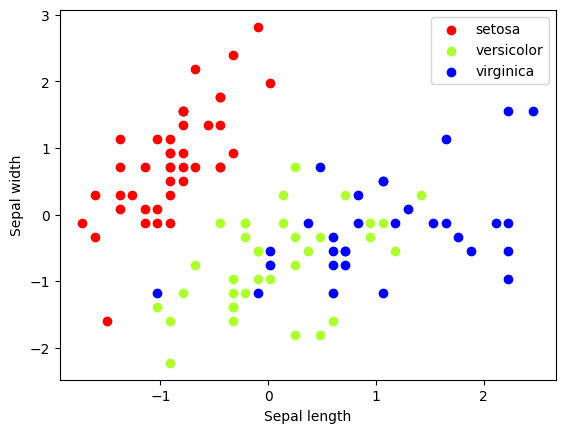

[[-2.51673916e+01  1.14955939e+01]
 [-1.43910433e-01 -2.76193863e+00]
 [ 8.47878018e+00 -7.73987839e-14]]
[-17.05016033   0.64133995  -5.45284158]


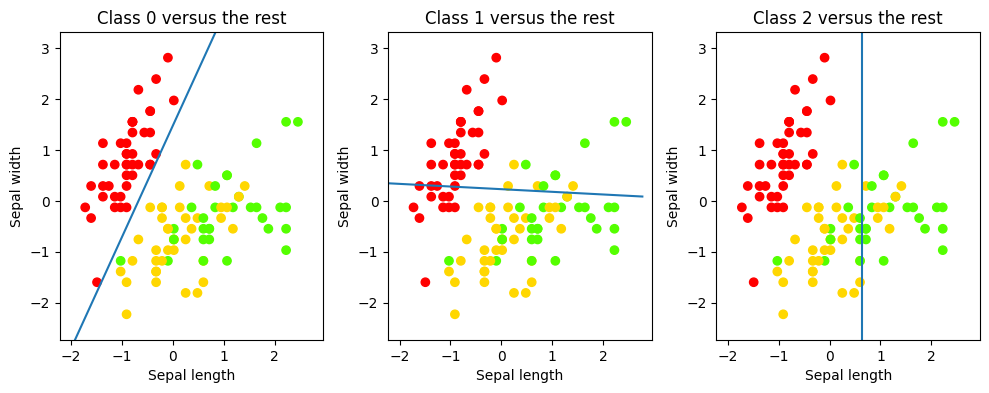

[0]
[[ 15.61944086   0.58924588 -16.13187759]]
0.8125
0.7368421052631579
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00         8
  versicolor       0.53      0.73      0.62        11
   virginica       0.80      0.63      0.71        19

    accuracy                           0.74        38
   macro avg       0.78      0.79      0.77        38
weighted avg       0.76      0.74      0.74        38

[[ 8  0  0]
 [ 0  8  3]
 [ 0  7 12]]
My name is Matthew Murphy
My NetID is: mdmurph
I hereby certify that I have read the University policy on Academic Integrity and that I am not in violation.
[0.5        0.6        0.73333333 0.8        0.86666667]
Mean score: 0.700 (+/- 0.067)


<Figure size 640x480 with 0 Axes>

In [3]:
%run "/content/G&M_SGD_Classifier_Yashvi_Bhatt.py"
#Part 1 — Iris (G&M pp. 10–18, fixed imports)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
import pandas as pd
TREASURY_CSV_PATH = '/content/Treasury Squeeze test - DS101.csv'
df = pd.read_csv(TREASURY_CSV_PATH)

print("Shape:", df.shape)
print(df.head())
print("Columns:", list(df.columns))
#Part 2 — Treasury Squeeze (same model)


FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/MyDrive/Colab Notebooks/IE498/Treasury Squeeze test - DS101.csv'

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

TARGET_COL = 'squeeze'
drop_cols = ['row_id', 'contract', TARGET_COL]
feature_cols = [c for c in df.columns if c not in drop_cols]

X_df = df[feature_cols].copy()
X_df = X_df.apply(pd.to_numeric, errors='coerce').fillna(0)

y_raw = df[TARGET_COL].copy()
le = LabelEncoder()
y = le.fit_transform(y_raw)

X = X_df.values

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.30, random_state=42, stratify=y
)

scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)
X_test_std  = scaler.transform(X_test)

clf = SGDClassifier(random_state=42)
clf.fit(X_train_std, y_train)

y_pred = clf.predict(X_test_std)
print("Treasury Squeeze accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification report:\n",
      classification_report(y_test, y_pred, zero_division=0,
                            target_names=le.classes_.astype(str)))

#Evaluation


Treasury Squeeze accuracy: 0.8111111111111111

Confusion matrix:
 [[172  12]
 [ 39  47]]

Classification report:
               precision    recall  f1-score   support

       False       0.82      0.93      0.87       184
        True       0.80      0.55      0.65        86

    accuracy                           0.81       270
   macro avg       0.81      0.74      0.76       270
weighted avg       0.81      0.81      0.80       270



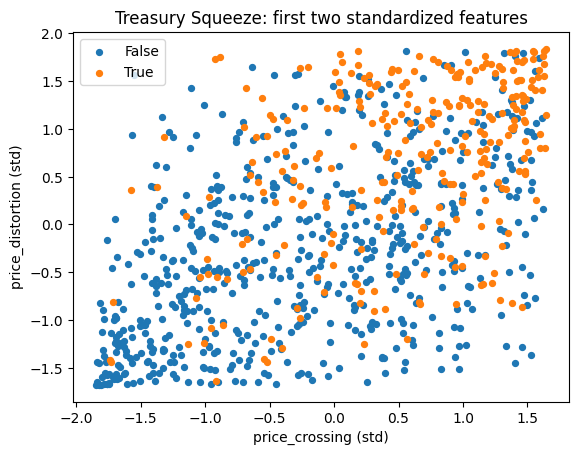

In [ ]:
import matplotlib.pyplot as plt

if X.shape[1] >= 2:
    X_std_full = scaler.fit_transform(X)
    plt.figure()
    for code, label in enumerate(le.classes_):
        mask = (y == code)
        plt.scatter(X_std_full[mask, 0], X_std_full[mask, 1], s=18, label=str(label))
    plt.xlabel(f"{feature_cols[0]} (std)")
    plt.ylabel(f"{feature_cols[1]} (std)")
    plt.title("Treasury Squeeze: first two standardized features")
    plt.legend()
    plt.show()
else:
    print("Not enough features to plot (need at least 2).")

#Initial 2-feature scatter


In [ ]:
print("My name is Yashvi Bhatt")
print("My NetID is: 676011118")
print("I hereby certify that I have read the University policy on Academic Integrity and that I am not in violation.")
#Certification


My name is Yashvi Bhatt
My NetID is: 676011118
I hereby certify that I have read the University policy on Academic Integrity and that I am not in violation.
